#### **Importing neccessary libraries and modules**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

#### **Initial verification of the dataset**

In [ ]:
os.listdir('drive/MyDrive/Drowsy/Dataset')  # Checking Availability of Dataset

['Closed', 'Open']

(86, 86)


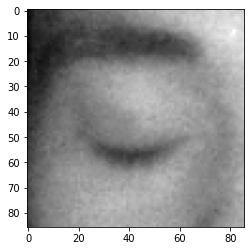

In [ ]:
img_array = cv2.imread("drive/MyDrive/Drowsy/Dataset/Closed/s0001_00001_0_0_0_0_0_01.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array, cmap="gray")
print(img_array.shape)

#### **Data Pre-processing, Transformation and Creating Training Data**

In [ ]:
DATA_DIRECTORY = "drive/MyDrive/Drowsy/Dataset/"
classes = ['Closed', 'Open']
training_data = []
img_size = 224

def create_training_data():
    for category in classes:
        path = os.path.join(DATA_DIRECTORY, category)
        class_num = classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                back_to_rgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(back_to_rgb, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                print("Exception Found" + e)

In [ ]:
create_training_data()

In [ ]:
len(training_data)

2709

In [ ]:
import random
random.shuffle(training_data)

In [ ]:
# Data and labels
X, Y = [], []

for feature, label in training_data:
    X.append(feature)
    Y.append(label)

In [ ]:
# Creating NumPy Arrays of Data and Label
X = np.array(X).reshape(-1, img_size, img_size, 3)
X = X / 255.0 # Normalizing

Y = np.array(Y)

print(X.shape, Y.shape)

(2709, 224, 224, 3) (2709,)


In [ ]:
# pickling for future purposes

import pickle

pickle_out = open("x.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

In [ ]:
# Loading the pickled data

pickle_in = open("x.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
Y = pickle.load(pickle_in)


### **Building Deep Learning Model - Transfer Learning**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = tf.keras.applications.mobilenet.MobileNet()

In [ ]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [ ]:
## Transfer Learning

base_input = model.layers[0].input
base_output = model.layers[-4].output

In [ ]:
flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [ ]:
my_model = keras.Model(inputs=base_input, outputs=final_output)

In [ ]:
my_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [ ]:
my_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

### **Training, Fitting the Model and Validation**

In [ ]:
history1 = my_model.fit(X, Y, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
68/68 [==============================] - 20s 211ms/step - loss: 0.1126 - accuracy: 0.9640 - val_loss: 0.6520 - val_accuracy: 0.6771
Epoch 2/10
68/68 [==============================] - 13s 186ms/step - loss: 0.0298 - accuracy: 0.9940 - val_loss: 0.5838 - val_accuracy: 0.7380
Epoch 3/10
68/68 [==============================] - 13s 187ms/step - loss: 0.0052 - accuracy: 0.9972 - val_loss: 0.2444 - val_accuracy: 0.8875
Epoch 4/10
68/68 [==============================] - 13s 187ms/step - loss: 0.0127 - accuracy: 0.9963 - val_loss: 0.3109 - val_accuracy: 0.8911
Epoch 5/10
68/68 [==============================] - 13s 187ms/step - loss: 0.0140 - accuracy: 0.9958 - val_loss: 0.0994 - val_accuracy: 0.9613
Epoch 6/10
68/68 [==============================] - 13s 190ms/step - loss: 0.0065 - accuracy: 0.9986 - val_loss: 0.1636 - val_accuracy: 0.9299
Epoch 7/10
68/68 [==============================] - 13s 189ms/step - loss: 0.0035 - accuracy: 0.9991 - val_loss: 0.0216 - val_accuracy: 0.9871

### **Visualizing the Performance of the Model:**

#### **1. Training Accuracy vs Validation Accuracy:**

In [ ]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

Text(0.5, 1.0, 'Training and Validation Accuracy')

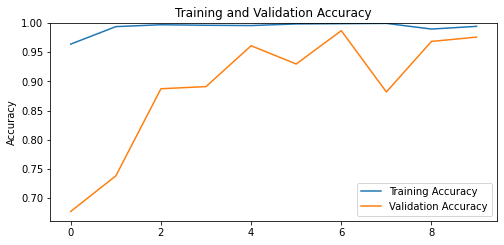

In [ ]:
# Plotting

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

#### **2. Training Loss vs Validation Loss:**

In [ ]:
loss = history1.history['loss']
val_loss = history1.history['val_loss']

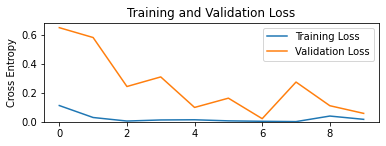

In [ ]:
# Plotting

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

### **Save Model:**

In [ ]:
my_model.save('train_dd.h5')

### **Testing on Dataset:**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import cv2


model = tf.keras.models.load_model('drive/MyDrive/Collection/train_dd.h5')

In [ ]:
def predict_single_eye(path):
    ''' Enter the path of the image'''
    img_size = 224
    img_array = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    # plt.imshow(img_array)
    back_to_rgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
    new_array = cv2.resize(back_to_rgb, (img_size, img_size))

    x_input = np.array(new_array).reshape(1, img_size, img_size, 3)
    x_input = x_input / 255.0

    plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
    prediction = model.predict(x_input)

    if prediction < 0.7:
        pred = f'Drowsy - Closed Eye - {np.around(100*(1 - prediction[0][0]), 4)} accuracy'
    else:
        pred = f'Active - Open Eye - {np.around(100*(prediction[0][0]), 4)} accuracy'

    return pred, prediction

('Drowsy - Closed Eye - 99.8808 accuracy', array([[0.0011922]], dtype=float32))

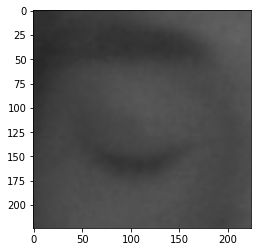

In [ ]:
predict_single_eye('drive/MyDrive/Drowsy/Dataset/Closed/s0001_00003_0_0_0_0_0_01.png')

('Active - Open Eye - 99.9998 accuracy', array([[0.999998]], dtype=float32))

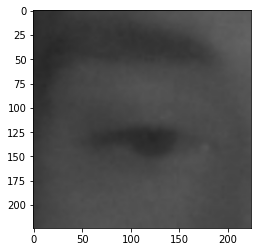

In [ ]:
predict_single_eye('drive/MyDrive/Drowsy/Dataset/Open/s0001_01842_0_0_1_0_0_01.png')

### **Testing on Random Inputs:**

#### **Single Eye Image:**

In [ ]:
def predict_single_eye(path):
    ''' Enter the path of the image'''
    img_size = 224
    img_array = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    # plt.imshow(img_array)
    back_to_rgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
    new_array = cv2.resize(back_to_rgb, (img_size, img_size))

    x_input = np.array(new_array).reshape(1, img_size, img_size, 3)
    x_input = x_input / 255.0

    plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
    prediction = model.predict(x_input)

    if prediction < 0.7:
        pred = f'Drowsy - Closed Eye - {np.around(100*(1 - prediction[0][0]), 4)} accuracy'
    else:
        pred = f'Active - Open Eye - {np.around(100*(prediction[0][0]), 4)} accuracy'

    return pred, prediction

('Drowsy - Closed Eye - 99.8123 accuracy',
 array([[0.00187658]], dtype=float32))

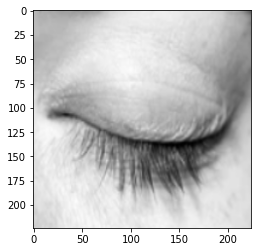

In [ ]:
predict_single_eye('single_close.png')

('Active - Open Eye - 99.9988 accuracy', array([[0.9999876]], dtype=float32))

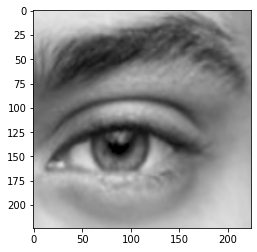

In [ ]:
predict_single_eye('single_open.png')

#### **Complete Image/Face:**

In [ ]:
lefteye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_lefteye_2splits.xml')
righteye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_righteye_2splits.xml')

In [ ]:
def predict_full_image(path):
    ''' Takes in the path of the image to predict'''

    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)

    left_eyes = lefteye_cascade.detectMultiScale(img)
    right_eyes = righteye_cascade.detectMultiScale(img)
    all_eyes = [*left_eyes, *right_eyes]

    if left_eyes == () and right_eyes == ():
        print("Eyes not detected")
    else:
        print(len(all_eyes))
        preds = []
        img_size = 224
        for i, (x,y,w,h) in enumerate(all_eyes):
            print(i, (x, y, w, h))
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            plt.imshow(cv2.cvtColor(roi_color, cv2.COLOR_BGR2RGB))
            new_array = cv2.resize(roi_color, (img_size, img_size))

            x_input = np.array(new_array).reshape(1, img_size, img_size, 3)
            x_input = x_input / 255.0

            prediction = model.predict(x_input)
            preds += prediction,
        
        if any(p < 0.9 for p in preds):
            print('DROWSY')
        else:
            print('ACTIVE')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


1
0 (750, 148, 498, 498)
DROWSY


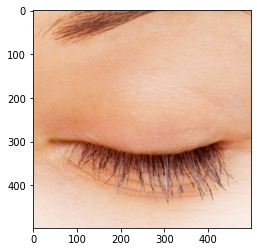

In [ ]:
predict_full_image('1_closed_complete.jpg')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


4
0 (203, 50, 62, 62)
1 (120, 54, 64, 64)
2 (130, 53, 58, 58)
3 (212, 58, 52, 52)
DROWSY


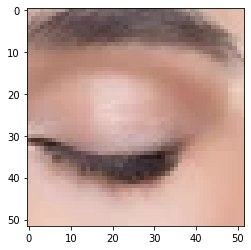

In [ ]:
predict_full_image('2_closed_complete.jpg')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


4
0 (551, 225, 96, 96)
1 (407, 232, 93, 93)
2 (409, 231, 94, 94)
3 (550, 225, 97, 97)
ACTIVE


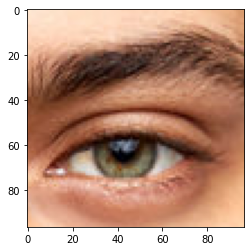

In [ ]:
predict_full_image('1_open_complete.jpg')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if sys.path[0] == '':


4
0 (532, 135, 114, 114)
1 (349, 142, 109, 109)
2 (334, 133, 118, 118)
3 (527, 148, 102, 102)
ACTIVE


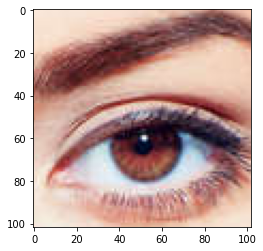

In [ ]:
predict_full_image('2_open_complete.jpg')